# 204102302 - CHAVITI VASANTHA LAKSHMI 

# PROJECT TITLE --->

# Analysis of LSB, DFT and DCT Based Approach For Image Steganography 

__INTRODUCTION TO STEGANOGRAPHY ---->__

Steganography has long been regarded as a tool used for illicit and destructive purposes such as crime and warfare. 
Steganography is the process of hiding a secret message within a larger one in such a way that someone cannot know the presence or contents of the hidden message. The purpose of Steganography is to maintain secret communication between two parties. Unlike cryptography, which conceals the contents of a secret message, steganography conceals the very fact that a message is communicated. Although steganography differs from cryptography and watermarking, there are many analogies between them

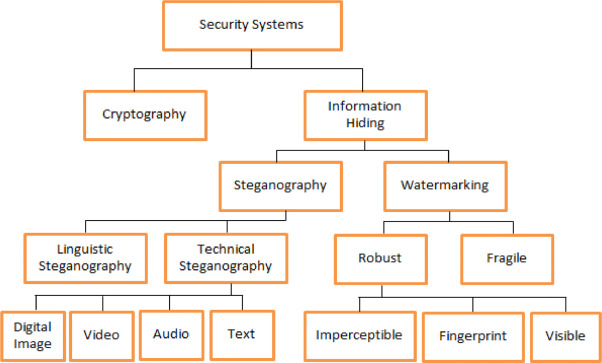

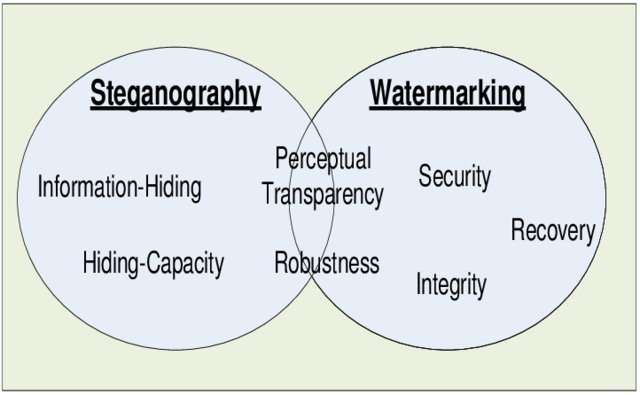

# __**Importing necessary libraries__

In [1]:
#necessary librariess
import numpy as np 
import random 
import scipy.signal as dsp
import scipy.fft as transform
import matplotlib.pyplot as plt
import cv2
import itertools
from struct import pack,unpack

# __Least Significant Bit (LSB) Method :-__

__#IN LSB METHOD WE ARE GOING TO EMBEDD THE SECRET IMAGE INTO ORIGINAL IMAGE__

PSNR for original image= 44.58793131489867 
CV2 PSNR for orginal image=  44.58793131489867
PSNR for secret image=  16.830087973300714 
CV2 PSNR for secret image:  16.830087973300714


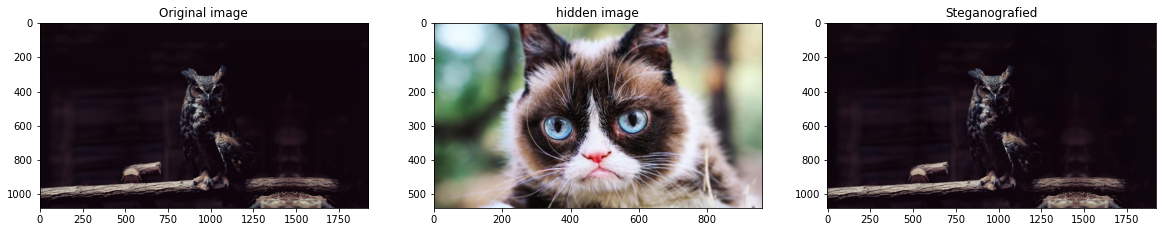

In [2]:
# img1 and img2 are the two input images 
img1 = cv2.imread('test.jpg') 
img2 = cv2.imread('grumpy.jpg')
#resize the coded image
img2_upscaled = cv2.resize(img2, (img1.shape[1],img1.shape[0]), interpolation = cv2.INTER_AREA)
def psnr(im1, im2):
    mse = np.mean((im1.astype(np.float64) / 255 - im2.astype(np.float64) / 255) ** 2)
    return 10 * np.log10(1. / mse)
def psnr_cv(im1, im2):
    return cv2.PSNR(im1, im2)
#LSB Encryption method
#Encryption function 
def lsb_encrypt(img1, img2, k): 
    mask = 256 - 2**k
    stego = (img1 & mask) | (img2 >> (8 - k))            
    return stego
#Decryption function 
def lsb_decrypt(img, k): 
    mask = 2**k - 1
    output = (img & mask) << (8 - k)
    return output
#Test encryption
backup = img1
steg = lsb_encrypt(backup,img2_upscaled, 2)
# Test decryption
secret = lsb_decrypt(steg, 2) 
print('PSNR for original image=', psnr(img1, steg), '\nCV2 PSNR for orginal image= ', psnr_cv(img1, steg))
print('PSNR for secret image= ', psnr(img2_upscaled, secret), '\nCV2 PSNR for secret image: ', psnr_cv(img2_upscaled, secret))
fig, [ax1, ax2 , ax3] = plt.subplots(1,3, figsize=(20, 6))
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title("Original image")
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title("hidden image")
ax3.imshow(cv2.cvtColor(steg, cv2.COLOR_BGR2RGB))
ax3.set_title("Steganografied")
plt.show()

# __Discrete Cosine Transform(DCT ) Method :-__

__IN DCT WE ARE GOING TO EMBEDD A SECRET MESSAGE INTO ORIGINAL IMAGE__

Text(0.5, 1.0, 'Original image-->pepper')

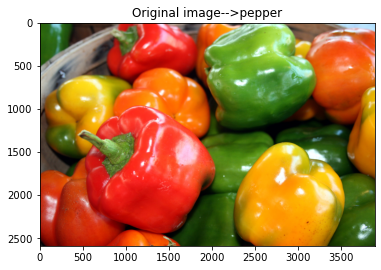

In [3]:
img3 = cv2.imread('pepper.jpg') 
fig = plt.figure(10,figsize=(6,8))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title("Original image-->pepper")

# encoding and decoding

49 50 42 72 101 108 108 111 32 119 111 114 108 100 33 

Available capacity:  157464 bits


''

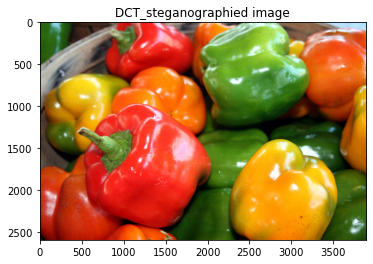

In [4]:
quant = np.array([[16,11,10,16,24,40,51,61],
                 [12,12,14,19,26,58,60,55],
                 [14,13,16,24,40,57,69,56],
                 [14,17,22,29,51,87,80,62],
                 [18,22,37,56,68,109,103,77],
                 [24,35,55,64,81,104,113,92],
                 [49,64,78,87,103,121,120,101],
                 [72,92,95,98,112,100,103,99]])
def chunks(l, n):
        m = int(n)
        for i in range(0, len(l), m):
            yield l[i:i + m]
## input -image
def dct_encode(im_source, message):
    img = im_source
    row, col = img.shape[:2]
    secret = str(len(message))+'*'+message
    binary = str.encode(secret)
    for i in range(len(binary)):
        print(binary[i],end= ' ')
    print("\n")
    # Interpolate image up to the divisible blocks
    if row%8 != 0 or col%8 != 0:
        print('Resizing image up to: ', col+(8-col%8),row+(8-row%8))
        img = cv2.resize(img,(col+(8-col%8),row+(8-row%8)))
        row, col = img.shape[:2]
    # Check if the message could be potentially fitted
    print("Available capacity: ", int((row/8)*(col/8)), "bits")
    if len(message) >= ((row/8)*(col/8)):
        raise Exception("Message could not be fitted into cover image")
    # Split image into RGB channels
    img_b,img_g,img_r = cv2.split(img)
    img_b = np.float32(img_b)
    img_g = np.float32(img_g)
    img_r = np.float32(img_r)
    img_blocks = [img_b[j:j+8, i:i+8]-128 for (j,i) in itertools.product(range(0,row,8),range(0,col,8))]
    blocks_per_channel = len(img_blocks)
    img_blocks.extend([img_g[j:j+8, i:i+8]-128 for (j,i) in itertools.product(range(0,row,8),range(0,col,8))])
    img_blocks.extend([img_r[j:j+8, i:i+8]-128 for (j,i) in itertools.product(range(0,row,8),range(0,col,8))])
    # Making DCT transform
    dct_blocks = [np.round(cv2.dct(block)) for block in img_blocks]
    # Blocks then run through quantization table
    dct_blocks = [np.round(block/quant) for block in dct_blocks]
    messIndex = 0
    letterIndex = 0
    for i, block in enumerate(dct_blocks):
        for k in range(3):
            shift = k*blocks_per_channel
            b = dct_blocks[i+shift]
            #find LSB in DC coeff and replace with message bit
            DC = b[0][0]
            #print(DC, end=' ')
            DC = np.uint8(DC)
            DC = np.unpackbits(DC)
            #print(DC, end=' ')
            DC[7] = (binary[messIndex]>>letterIndex)&0b1
            #print((binary[messIndex]>>letterIndex)&0b1, end=' ')
            #print(DC,end= ' ')
            DC = np.packbits(DC).astype(np.int8)
            #print(DC,end= ' ')
            DC = np.float32(DC)
            #print(DC)
            b[0][0] = DC
        letterIndex = letterIndex+1
        if letterIndex == 8:
            letterIndex = 0
            messIndex = messIndex + 1
            if messIndex == len(binary):
                break
    # Inverse DCT
    inv_chunks = [block*quant for block in dct_blocks]
    inv_chunks = [cv2.idct(block)+128 for block in inv_chunks]
    restored=[]
    for k in range(3):
        channel=[]
        start = k*blocks_per_channel
        end = (k+1)*blocks_per_channel
        for chunkRowBlocks in chunks(inv_chunks[start:end], col/8):
            for rowBlockNum in range(8):
                for block in chunkRowBlocks:
                    channel.extend(block[rowBlockNum])
        channel = np.array(channel).reshape(row, col)
        restored.append(channel)
    #res = cv2.merge((restored[0],np.uint8(img_g),np.uint8(img_r)))
    res = cv2.merge((restored[0],restored[1],restored[2]))
    res = cv2.convertScaleAbs(res)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.title("DCT_steganographied image")
    return res
def dct_decode(img):
    row,col = img.shape[:2]
    messSize = None
    messageBits = []
    buff = 0
    #split image into RGB channels
    bImg,gImg,rImg = cv2.split(img)
    #print(bImg[0:16,0:16])
    #message hid in blue channel so converted to type float32 for dct function
    bImg = np.float32(bImg)
    #break into 8x8 blocks
    imgBlocks = [bImg[j:j+8, i:i+8]-128 for (j,i) in itertools.product(range(0,row,8),range(0,col,8))]    
    #blocks run through quantization table
    quantizedDCT = [cv2.dct(img_Block) for img_Block in imgBlocks]
    quantizedDCT = [img_Block/quant for img_Block in quantizedDCT]
    #print(quantizedDCT[1][0])
    i=0
    #message extracted from LSB of DC coeff
    for quantizedBlock in quantizedDCT:
        DC = quantizedBlock[0][0]
        ### Integer
        DC = np.uint8(DC)
        #print(DC, end=' ')
        DC = np.unpackbits(DC)
        if DC[7] == 1:
            buff+= 1<<i
        #print(DC)
        i=1+i
        if i == 8:
            #print(buff, end=' ')    
            messageBits.append(chr(buff))
            buff = 0
            i =0
            if messageBits[-1] == '*' and messSize is None:
                try:
                    messSize = int(''.join(messageBits[:-1]))
                except:
                    pass
        if len(messageBits) - len(str(messSize)) - 1 == messSize:
            return ''.join(messageBits)[len(str(messSize))+1:]
    return ''
dct_img = dct_encode(img3, 'Hello world!')
dct_decode(dct_img)

# Discrete Fourier Transformation(DFT) Method :-

__IN DFT WE ARE GOING TO EMBEDD SECRET IMAGE INTO ORIGINAL IMAGE__

Text(0.5, 1.0, 'Original image-->lenna')

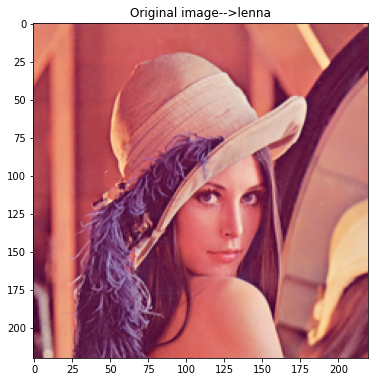

In [5]:
img4 = cv2.imread('LENNA1.png') 
fig = plt.figure(10,figsize=(6,8))
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title("Original image-->lenna")

# Encoding and Decoding

In [6]:
def DFT_GS_ENCODE(im_source,im_embed):
    image = im_source
    message = im_embed.flatten().astype(np.uint8).tobytes()
    print(len(message))
    # Checking limiting parameter
    if (len(message) <= (image.shape[0]*image.shape[1]*3/4 - 16)): 
        raise Exception("Message could not be fitted into cover image")
    # word counter
    c = 0
    # bit counter
    b = 0
    # Sliding 2x2 Window of cover image
    for i in range (0,(image.shape[0]-2)):
        for j in range (0,(image.shape[1]-2)):
            # Taking 2x2 window
            window = image[i:i+2,j:j+2]
            # Process Fourier Transform and take the real part
            fd = transform.fft2(window)
            r = np.real(fd).astype(int).flatten()
            # Assign LSB to embedding image bit, skipping first freq component
            ## Gathering bits 
            bits = 0
            if(c < len(message)):
                if b <= 5:
                    # we do not need to select the next word
                    bits = (message[c]>>b)&0b00000111 #Take last 3 bits with shift by bit counter
                else:
                    # selecting next word
                    residual = 8 - b
                    bits = (message[c]>>b)&(2**residual-1) # Take residual part of the current value
                    if(c < len(message)-1):
                        c += 1 # Select next byte
                        b = residual # Assign residual part for next byte
                        bits += (message[c]>>b)&0b111 # Take part of the next value
                    else:
                        break
                b += 3
            else:
                break
        if(c >= len(message)):
            break
            # Setting bits
            for k in range(0,3,1):
                r[k+1] += (bits>>k)&1  # Assigning bit to the frequency tap
            # Taking inverse transform
            chunk = np.reshape(r, (-1, 2))
            image[i:i+2,j:j+2] = np.real(transform.ifft2(chunk))
    # Converting double to 8 bits unsigned integer value
    #res = image.astype(np.uint8)
    res = image
    return res
def DFT_GS_DECODE(im_coded, height, width):
    image = im_coded
    size = height*width
    sequence = []
    word = 0
    # word counter
    c = 0
    # bit counter
    b = 0
    # Sliding 2x2 Window of cover image
    for i in range (0,(im_coded.shape[0]-2)):
        for j in range (0,(im_coded.shape[0]-2)):
            # Taking 2x2 window
            window = image[i:i+2,j:j+2]
            # Process Fourier Transform and take the real part
            fd = transform.fft2(window)
            r = np.real(fd).astype(int).flatten()
            # Take last 3 values
            for k in range(1,4,1):
                value = r[k]
                #Take LSB from freq response
                LSB = value&1
                word = (word<<b)|LSB
                b += 1
                if b == 8:
                    b = 0
                    c += 1;
                    sequence.append(np.uint8(word))
                r[k] = value^(1<<0)
            chunk = np.reshape(r, (-1, 2))
            image[i:i+2,j:j+2] = np.real(transform.ifft2(chunk))
            #print(word, sequence)
            if (c >= size):
                break
        if (c >= size):
            break
    np_array = np.frombuffer(bytearray(sequence), dtype=np.uint8)
    h = 0
    w = 0
    print(c)
    secret = np.zeros([height, width], dtype=int)
    for i in range(0, len(np_array)):
        secret[h,w] = np_array[i]
        if w >= width - 1:
            h += 1
            w = 0
        if h >= height - 1:
            break
        w += 1
    # Converting double to 8 bits unsigned integer value
    #res = image.astype(np.uint8)
    #res = image
    return image, secret

1555200


Text(0.5, 1.0, 'DFT_Steganographied image')

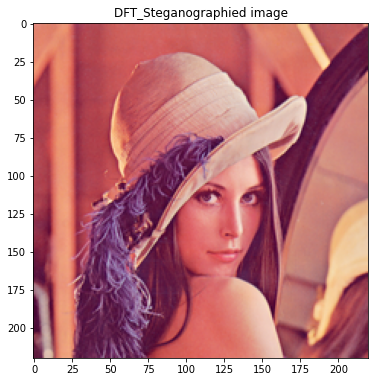

In [7]:
x = DFT_GS_ENCODE(img4,img2)
fig = plt.figure(10,figsize=(6,8))
plt.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
plt.title("DFT_Steganographied image")